# <font color = "Red"> Marketing Analytics </font>

# <font color = "Blue"> Conjoint </font>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy.special import softmax

In [2]:
github_raw_url = "https://raw.githubusercontent.com/Dforouzanfar/Marketing-Project/master/Survey_Results.xlsx"
Ascoli = pd.read_excel(github_raw_url, index_col=0)

In [4]:
# non-categorical columns
non_categorical_columns = ['Travel Frequency', 'Price', 'Accessibility of transportation', 'Availability of information',
                            'Popularity of the place', 'Cultural/Historical activities',
                            'Social activities', 'Activities in nature', 'Gastronomical activities',
                            'Weather', 'Discovery']

non_categorical_data = Ascoli[non_categorical_columns]

# Find the column name with the maximum value for each row
Ascoli['Choice'] = non_categorical_data.idxmax(axis=1)

# Convert the "Choice" column to binary (1 if it's the highest-rated level, 0 otherwise)
Ascoli['Choice'] = Ascoli.apply(lambda row: 1 if row[row['Choice']] == 5 else 0, axis=1)

In [6]:
# Assuming 'Choice' is the dependent variable, and the other columns are independent variables
independent_variables = non_categorical_columns

# Fit the OLS model
model = sm.OLS(Ascoli['Choice'], sm.add_constant(Ascoli[independent_variables]))
result = model.fit()

# part-worth utilities
part_worth_utilities = result.params[1:]

# Display part-worth utilities
print("Part-Worth Utilities:")
print(part_worth_utilities)

# attribute importance
attribute_importance = part_worth_utilities.abs().sum() / len(part_worth_utilities)
print("\nAttribute Importance:")
print(attribute_importance)

Part-Worth Utilities:
Travel Frequency                  -0.024708
Price                              0.004841
Accessibility of transportation    0.203236
Availability of information       -0.097270
Popularity of the place           -0.033126
Cultural/Historical activities     0.159150
Social activities                  0.022377
Activities in nature              -0.020146
Gastronomical activities           0.274152
Weather                           -0.091872
Discovery                         -0.084475
dtype: float64

Attribute Importance:
0.09230471848633554


In [9]:
# 'X' our design matrix (attribute levels) and 'y' the responses
X = Ascoli[non_categorical_columns]
y = Ascoli['Choice']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get coefficients (part-worth utilities)
part_worth_utilities = model.coef_

# Calculate importance weights
importance_weights = np.abs(part_worth_utilities) / np.sum(np.abs(part_worth_utilities))

# Display results
print("\nConjoint Regression Results:")
print("Coefficients (Part-Worth Utilities):", part_worth_utilities)
print("Importance Weights:", importance_weights)



Conjoint Regression Results:
Coefficients (Part-Worth Utilities): [-0.02470822  0.00484063  0.20323574 -0.09726993 -0.03312566  0.15914978
  0.02237724 -0.02014615  0.27415186 -0.09187172 -0.08447499]
Importance Weights: [0.02433463 0.00476744 0.20016286 0.09579923 0.0326248  0.15674347
 0.0220389  0.01984155 0.27000674 0.09048264 0.08319775]


In [10]:
# Add a constant term to the design matrix
X = sm.add_constant(X)

# Fit the OLS model
model_ols = sm.OLS(y, X).fit()

# Display the summary
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                 Choice   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     1.086
Date:                Sat, 20 Jan 2024   Prob (F-statistic):              0.465
Time:                        16:53:53   Log-Likelihood:               -0.91638
No. Observations:                  20   AIC:                             25.83
Df Residuals:                       8   BIC:                             37.78
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [11]:
# 'X' our design matrix (attribute levels) and 'y' the responses
X = Ascoli[non_categorical_columns]
y = Ascoli['Choice']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Create a DataFrame to hold the results
results = pd.DataFrame({
    'Attribute': non_categorical_columns,
    'Coefficient': model.coef_
})

# Display the results
print(results)

# If you want additional information, you can also print the intercept and R-squared
print("\nIntercept:", model.intercept_)
print("R-squared:", model.score(X, y))


                          Attribute  Coefficient
0                  Travel Frequency    -0.024708
1                             Price     0.004841
2   Accessibility of transportation     0.203236
3       Availability of information    -0.097270
4           Popularity of the place    -0.033126
5    Cultural/Historical activities     0.159150
6                 Social activities     0.022377
7              Activities in nature    -0.020146
8          Gastronomical activities     0.274152
9                           Weather    -0.091872
10                        Discovery    -0.084475

Intercept: -0.703727489628537
R-squared: 0.5989453033870635


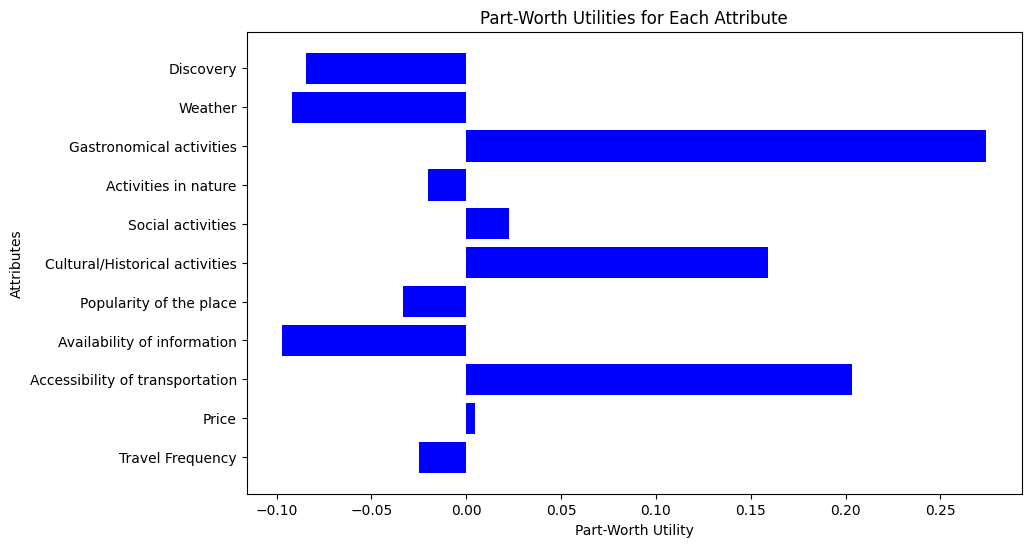

In [14]:
model = LinearRegression()

# Fit the model
model.fit(non_categorical_data, Ascoli['Choice'])

# Display Coefficients (Part-Worths)
part_worths = dict(zip(non_categorical_columns, model.coef_))

# Plot Part-Worths as a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(list(part_worths.keys()), list(part_worths.values()), color='blue')
plt.xlabel('Part-Worth Utility')
plt.ylabel('Attributes')
plt.title('Part-Worth Utilities for Each Attribute')
plt.show()

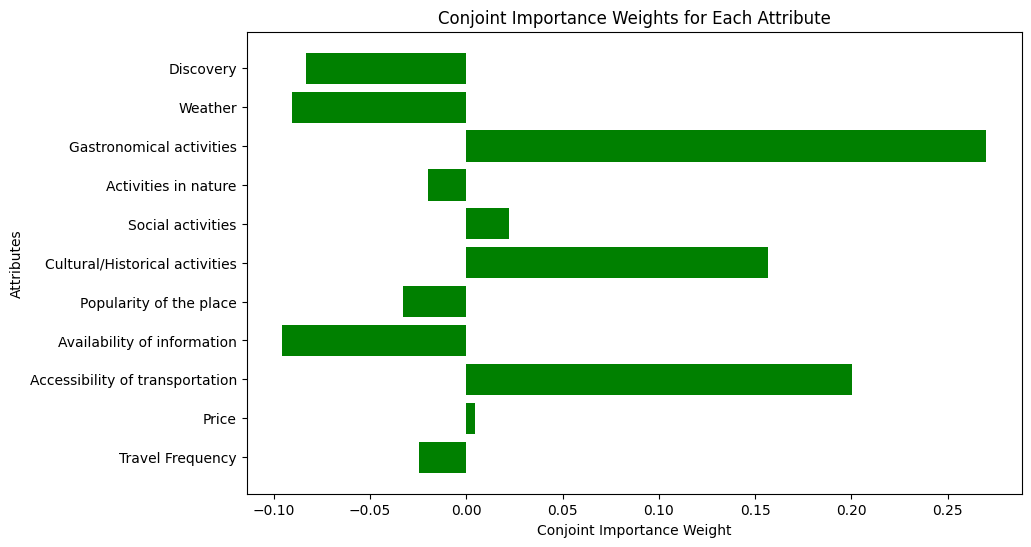

In [15]:
# Initialize Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(non_categorical_data, Ascoli['Choice'])

# Calculate Part-Worths
part_worths = model.coef_

# Calculate Conjoint Importance Weights (normalized part-worths)
importance_weights = part_worths / abs(part_worths).sum()

# Plot Conjoint Importance Weights
plt.figure(figsize=(10, 6))
plt.barh(non_categorical_columns, importance_weights, color='green')
plt.xlabel('Conjoint Importance Weight')
plt.ylabel('Attributes')
plt.title('Conjoint Importance Weights for Each Attribute')
plt.show()

In [16]:
# Initialize Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(non_categorical_data, Ascoli['Choice'])

# Calculate Part-Worths
part_worths = model.coef_

# Calculate Base Utility (Intercept)
base_utility = model.intercept_

print("Base Utility:", base_utility)


Base Utility: -0.703727489628537


### Softmax Function

In [18]:
part_worths = np.array([-0.024708, 0.004841, 0.203236, -0.097270, -0.033126, 0.159150, 0.022377, -0.020146, 0.274152, -0.091872, -0.084475])
base_utility = -0.703727489628537


product_scenarios = np.array([
    [2, 3, 1, 4, 2, 3, 4, 3, 2, 1, 4],
    [4, 2, 5, 3, 4, 1, 2, 4, 3, 2, 5],
    [3, 4, 2, 5, 3, 2, 1, 4, 5, 2, 3],
    [1, 5, 3, 2, 1, 4, 5, 1, 3, 4, 2],
])

# Utility for each scenario
scenario_utilities = np.dot(product_scenarios, part_worths) + base_utility

# Apply softmax function to convert utilities to probabilities for each scenario
probabilities = softmax(scenario_utilities, axis=0)

# Calculate predicted market share for each product based on the average probability across scenarios
predicted_market_share = probabilities.mean(axis=0)

# Convert the predicted_market_share to a scalar (float)
predicted_market_share_scalar = float(predicted_market_share)

# Display the predicted market share for each product
market_share_df = pd.DataFrame({'Product': [1], 'Predicted Market Share': [predicted_market_share_scalar]})
print("Predicted Market Share:")
print(market_share_df)


# Analyze the results
print("\nAnalysis:")
print("The predicted market share for each product provides insights into the relative popularity of individual product scenarios.")
print("Products with higher predicted market share are expected to be more preferred by the target audience.")
print("This information can guide decisions related to product design, features, and marketing strategies.")


Predicted Market Share:
   Product  Predicted Market Share
0        1                    0.25

Analysis:
The predicted market share for each product provides insights into the relative popularity of individual product scenarios.
Products with higher predicted market share are expected to be more preferred by the target audience.
This information can guide decisions related to product design, features, and marketing strategies.


In [19]:
# Part-worth utilitie
part_worth_utilities = pd.Series({
    'Velocity': -0.024708,
    'Price': 0.004841,
    'Transportation': 0.203236,
    'Information': -0.097270,
    'Popularity of the place': -0.033126,
    'Cultural/Historical activities': 0.159150,
    'Social activities': 0.022377,
    'Activities in nature': -0.020146,
    'Gastronomical activities': 0.274152,
    'Weather': -0.091872,
    'Discovery': -0.084475
})

# Base utility
base_utility = -0.703727489628537

# Market simulation
num_scenarios = 5

# Simulate scenarios
simulated_data = []

for _ in range(num_scenarios):
    # Generate hypothetical changes in part-worth utilities
    hypothetical_changes = np.random.normal(scale=0.1, size=len(part_worth_utilities))

    # Apply changes to part-worth utilities
    scenario_utilities = part_worth_utilities + hypothetical_changes

    # Calculate utilities for each product
    utilities = base_utility + np.dot(non_categorical_data, scenario_utilities)

    # Calculate probabilities using softmax
    probabilities = softmax(utilities)

    # Simulate choices based on probabilities
    choices = np.random.choice(len(probabilities), size=len(probabilities), p=probabilities)

    # Calculate market share for each product
    market_share_per_product = np.bincount(choices, minlength=len(probabilities)) / len(choices)

    # Save simulated data
    simulated_data.append({
        'Scenario': _ + 1,
        'Utilities': scenario_utilities,
        'Probabilities': probabilities,
        'Choices': choices,
        'Market Share': market_share_per_product
    })

# Display simulated data
simulated_df = pd.DataFrame(simulated_data)
print(simulated_df)


   Scenario                                          Utilities  \
0         1  Velocity                          0.052562
Pri...   
1         2  Velocity                          0.004915
Pri...   
2         3  Velocity                         -0.094852
Pri...   
3         4  Velocity                         -0.146848
Pri...   
4         5  Velocity                         -0.177557
Pri...   

                                       Probabilities  \
0  [0.0140837184472137, 0.10160489248419419, 0.02...   
1  [0.036682456626312164, 0.056966412540456084, 0...   
2  [0.03923220670809871, 0.04467063299684726, 0.0...   
3  [0.021924203387227816, 0.06331709801698965, 0....   
4  [0.01817119022429094, 0.05866144084549695, 0.0...   

                                             Choices  \
0  [13, 15, 2, 1, 13, 7, 16, 11, 8, 3, 19, 10, 14...   
1  [3, 14, 16, 2, 0, 0, 18, 12, 12, 2, 2, 6, 1, 4...   
2  [17, 18, 11, 16, 11, 4, 3, 16, 4, 7, 10, 9, 11...   
3  [17, 15, 13, 6, 7, 7, 15, 11, 8, 13, 13





Scenario Analysis for Conjoint Simulation:
In conjoint analysis, scenarios represent different hypothetical situations or attribute levels that can influence consumer choices. The output is based on simulating respondent choices under various scenarios to understand the impact of changing product attributes on market share.

Key Components in Each Scenario:

Utilities:

Utilities represent the preference or desirability of each attribute level for respondents.
For example, in "Scenario 1," the utility for the attribute "Velocity" is -0.091687.

Probabilities:

Probabilities indicate the likelihood of a respondent choosing a particular product given the calculated utilities.
Higher utility values contribute to higher probabilities of product selection.

Choices:

Simulated choices are the products selected by each respondent in response to the given attribute levels.
In "Scenario 1," respondents made choices based on their preferences, resulting in a set of selected products.

Market Share:

Market share represents the proportion of respondents choosing each product, reflecting the overall preference in the market.
It is calculated based on the simulated choices and provides insights into the competitive landscape.
Interpretation Across Scenarios:

Scenario 1:

Negative utility for "Velocity" suggests a lower preference for this attribute.
The market share distribution indicates which products are more likely to be chosen by respondents.

Scenario 2:

Positive utility for "Velocity" implies a higher preference for this attribute.
Changes in probabilities and market share reflect the impact of altered attribute levels.

Scenario 3, 4, 5:

Additional scenarios explore different attribute level combinations and their effects on consumer choices.

Overall Insights:

Sensitivity Analysis:

Analyzing multiple scenarios helps assess the sensitivity of market share to changes in attribute levels.
Identifying attributes with the most significant impact on consumer choices.

Strategic Decision-Making:

Decision-makers can use these insights to inform product development, pricing, and marketing strategies.
Understanding how adjustments in attributes influence market preferences.

Competitive Positioning:

Evaluating the competitive position of products based on simulated market shares.
Identifying opportunities to enhance product features to gain a competitive edge.
This detailed analysis enables stakeholders to make informed decisions about product attributes, pricing strategies, and market positioning. The simulated scenarios provide a valuable tool for understanding consumer behavior and optimizing product offerings in a competitive market landscape.